In [36]:
import scipy.io.wavfile as wav
from scipy.fftpack import fft,fftfreq
import scipy.signal as signal
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

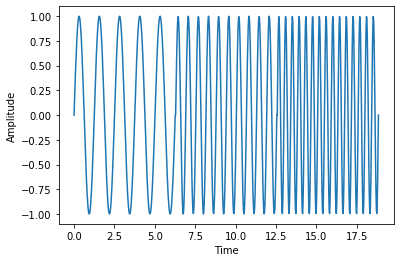

In [23]:
# Signal 1
#Time
a=np.linspace(0,2*np.pi,256)
ad=np.linspace(0,6*np.pi,256*3)

#Signal -1 
b=np.append(np.sin(5*a),np.sin(10*a))
b=np.append(b,np.sin(15*a))
plt.plot(ad,b)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

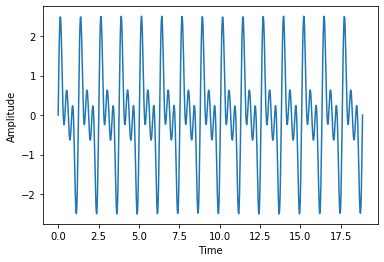

In [24]:
# Signal -2
c=np.sin(5*ad)+np.sin(10*ad)+np.sin(15*ad)
plt.plot(ad,c)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

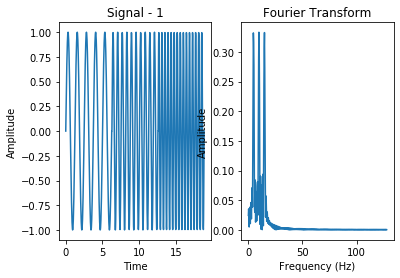

In [25]:
# FFT of both the signals
T=1.0/256
N=256*3

# xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
x=np.abs(fft(b,1000))*(2/N)
y=np.abs(fft(c,1000))*(2/N)
sample_freq = fftfreq(x.size, d=T)
index=np.where(sample_freq>0)
fig=plt.figure()
fig.add_subplot(1,2,1)
plt.plot(ad,b)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal - 1')
fig.add_subplot(1,2,2)
plt.plot(sample_freq[index],x[index])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform')
plt.show()

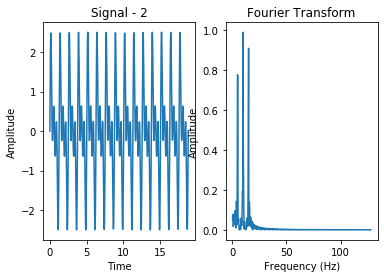

In [26]:
fig1=plt.figure()
fig1.add_subplot(1,2,1)
plt.plot(ad,c)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal - 2')
fig1.add_subplot(1,2,2)
plt.plot(sample_freq[index],y[index])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform')
plt.show()


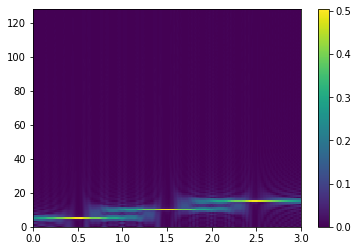

In [37]:
# STFT of signal -1
f, t, Zxx = signal.stft(b, fs=256,nperseg=256,window='boxcar',noverlap=255)
# print(f)
plt.pcolormesh(t, f, np.abs(Zxx))
plt.colorbar()
plt.show()

In [38]:
# To check the frequencies giving highest amplitude
v=np.transpose(np.abs(Zxx))
print(v.shape)
for T in range(len(v)):
    index=np.argmax(v[T])
#     print(f[index])
    

(769, 129)


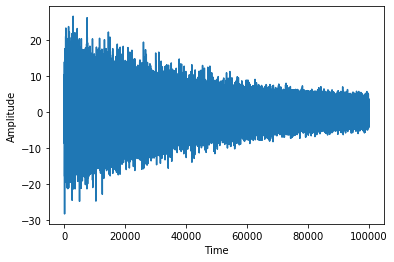

In [39]:
# Example -2 
fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = np.random.normal(scale=np.sqrt(noise_power),
                         size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise
plt.plot(range(len(x)),x)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

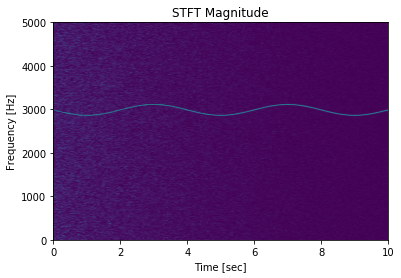

In [40]:
f, t, Zxx = signal.stft(x, fs, nperseg=1000)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

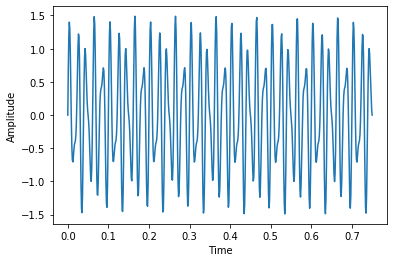

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


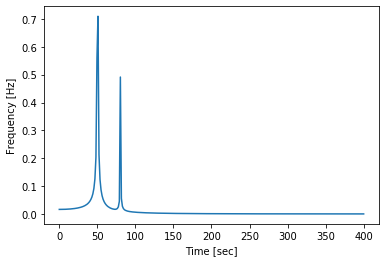

In [42]:
# Example 3
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
plt.plot(x,y)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()